In [14]:
import numpy as np
import matplotlib.pyplot as plt

X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(size=100)

In [15]:
from my_ml.PCA import PCA

In [16]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [17]:
# pca.transform(X)
pca.components_

array([[ 0.79891418,  0.60144503],
       [-0.60079795,  0.79940091]])

In [18]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [19]:
pca.components_

array([[0.7989142 , 0.60144501]])

In [20]:
X_reduction = pca.transform(X)
X_reduction.shape

(100, 1)

In [21]:
X_restore = pca.inverse_transform(X_reduction)
X_restore.shape

(100, 2)

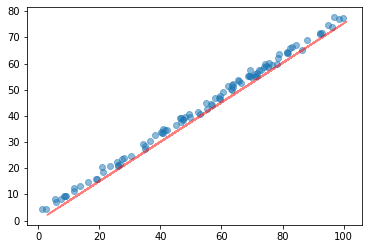

In [22]:
plt.scatter(X[:,0], X[:, 1], alpha=0.5)
plt.plot(X_restore[:,0], X_restore[:,1], color='red', alpha=0.5)
plt.show()

# scikit-learn中的PCA

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [25]:
pca.components_

array([[-0.79891415, -0.60144508]])

In [26]:
X_reduction = pca.transform(X)

In [28]:
X_reduction.shape

(100, 1)

In [30]:
X_restore = pca.inverse_transform(X_reduction)
X_restore.shape

(100, 2)

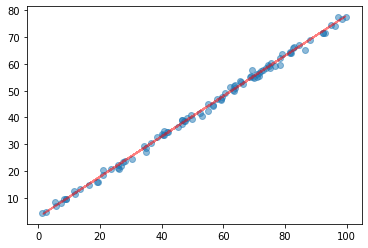

In [31]:
plt.scatter(X[:,0], X[:, 1], alpha=0.5)
plt.plot(X_restore[:,0], X_restore[:,1], color='red', alpha=0.5)
plt.show()

# scikit-learn 中的PCA在数据集digits上的应用

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [33]:
digits = datasets.load_digits()

In [34]:
X = digits.data
y = digits.target

In [35]:
X.shape

(1797, 64)

In [36]:
y.shape

(1797,)

In [37]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [41]:
X_train.shape

(1437, 64)

In [42]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

CPU times: user 18.2 ms, sys: 0 ns, total: 18.2 ms
Wall time: 17.3 ms


KNeighborsClassifier()

In [43]:
knn_clf.score(X_test, y_test)

0.9888888888888889

In [44]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
# pca.fit(X_test)   #  wrong  绝对不可以重新训练一个pca，要用和train数据一样的pca
X_test_reduction = pca.transform(X_test)
X_train_reduction.shape

(1437, 2)

In [46]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

CPU times: user 4.3 ms, sys: 230 µs, total: 4.53 ms
Wall time: 3.56 ms


KNeighborsClassifier()

In [47]:
knn_clf.score(X_test_reduction, y_test)

0.6055555555555555

In [50]:
# 找到对于某一数据集来说保留多少维合适
pca.explained_variance_ratio_

array([0.1450646 , 0.13714246])

In [51]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.transform(X_train)

array([[-1.29879170e+01,  1.72578562e+01, -1.27569905e+01, ...,
         9.68628805e-16,  1.88397160e-16, -1.24467984e-15],
       [-2.39618404e+00, -4.14169990e+00,  1.67148783e+01, ...,
         3.12232338e-15,  1.17725500e-15,  1.88480040e-16],
       [-7.33423122e+00,  1.62893854e+01,  7.68590347e-01, ...,
        -2.11384276e-15,  2.00735900e-15,  2.54676444e-16],
       ...,
       [-9.40085232e+00, -1.44887503e+00,  2.49977357e+01, ...,
        -2.85029180e-15,  1.46747293e-15, -1.03136837e-16],
       [-2.19189185e+00,  6.01600710e+00, -6.07337639e+00, ...,
         5.74531352e-16, -1.32394764e-15, -1.49393162e-16],
       [-9.20582236e+00, -1.86458189e+01, -8.65479770e-01, ...,
        -2.42763737e-15,  2.38156840e-15, -5.69942383e-17]])

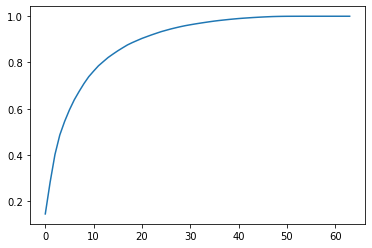

In [53]:
plt.plot(np.arange(X_train.shape[1]), [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])
plt.show()

In [56]:
pca = PCA(0.95)
# PCA?
pca.fit(X_train)

PCA(n_components=0.95)

In [59]:
pca.components_.shape
# 保留原数据的95%，对应的主成分分量个数为28

(28, 64)

In [60]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [61]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

CPU times: user 8.7 ms, sys: 735 µs, total: 9.43 ms
Wall time: 8.26 ms


KNeighborsClassifier()

In [62]:
knn_clf.score(X_test_reduction, y_test)

0.9833333333333333

In [69]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_reduction = pca.transform(X)
X_reduction.shape

(1797, 2)

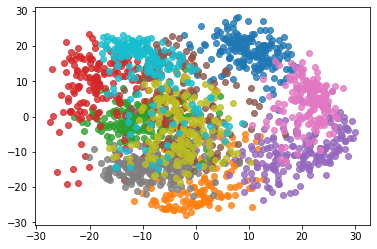

In [70]:
for i in range(10):
    plt.scatter(X_reduction[y==i, 0], X_reduction[y==i, 1], alpha=0.8)
plt.show()

In [ ]:
# 根据图片可以发现，区分蓝色和粉色只需要二维就够了